In [1]:
import torch
import numpy as np
from sbi_particle_physics.objects.model import Model
from sbi_particle_physics.managers.plotter import Plotter
from sbi_particle_physics.managers.backup import Backup
from sbi_particle_physics.managers.model_diagnostics import ModelDiagnostics
from sbi_particle_physics.config import MODELS_DIR, DATA_DIR

In [2]:
model = Backup.load_model_basic(directory=MODELS_DIR / "training_6")

Model loaded from /home/hep/nrc25/sbi-particle-physics/models/training_6/epoch_400.pkl


In [3]:
files = Backup.detect_files(DATA_DIR / "data_2")[-5:] # 5 last files
raw_data, raw_parameters, _ = Backup.load_data(files)
data = model.normalizer.normalize_data(raw_data)
parameters = model.normalizer.normalize_parameters(raw_parameters)

Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:37<00:00,  5.34it/s]


Calculating ranks for 200 SBC samples:   0%|          | 0/200 [00:00<?, ?it/s]

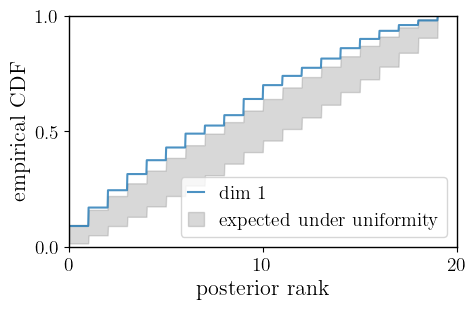

In [4]:
ModelDiagnostics.simulation_based_calibration(model, data[:200], parameters[:200], num_posterior_samples=1000)

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:15<00:00, 12.94it/s]


Calculating ranks for 200 SBC samples:   0%|          | 0/200 [00:00<?, ?it/s]

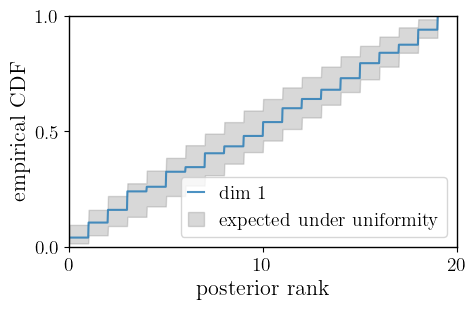

In [5]:
ModelDiagnostics.expected_coverage_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:14<00:00, 14.21it/s]


-1.631000280380249 Should be close to 0
0.8234535171851342 Should be larger than 0.05


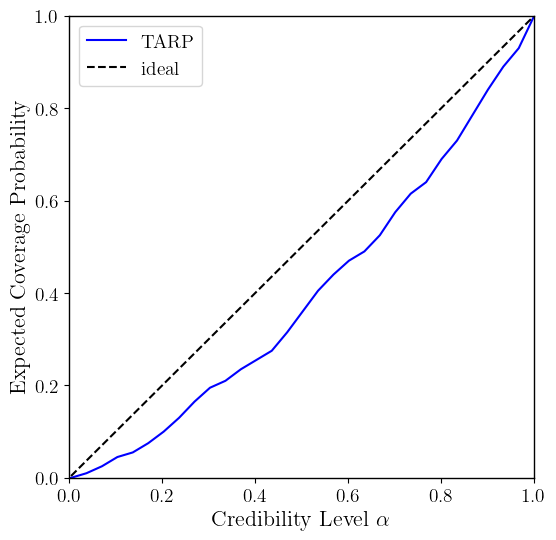

In [6]:
ModelDiagnostics.tarp_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

 Training neural network. Epochs trained: 199p-value: 0.5192, Reject H0 (misspecified): False


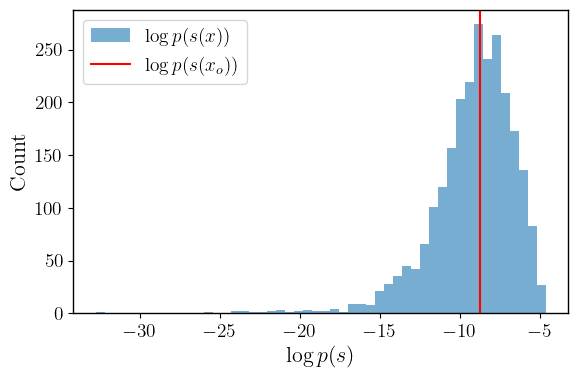

In [7]:
ModelDiagnostics.misspecification_test(model, data[-5002:-2], x_o=data[-1])

MMD p-value: 0.885


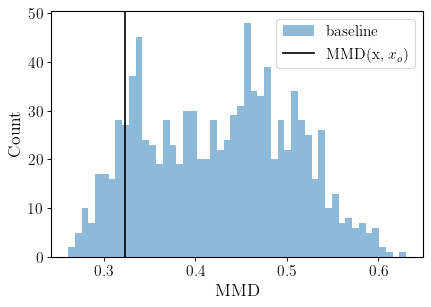

In [8]:
ModelDiagnostics.misspecification_test_mmd(model, data[-5002:-2], x_o=data[-1])
# only needs to be between 0.2->0.8 (model is wrong if <0.05)

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

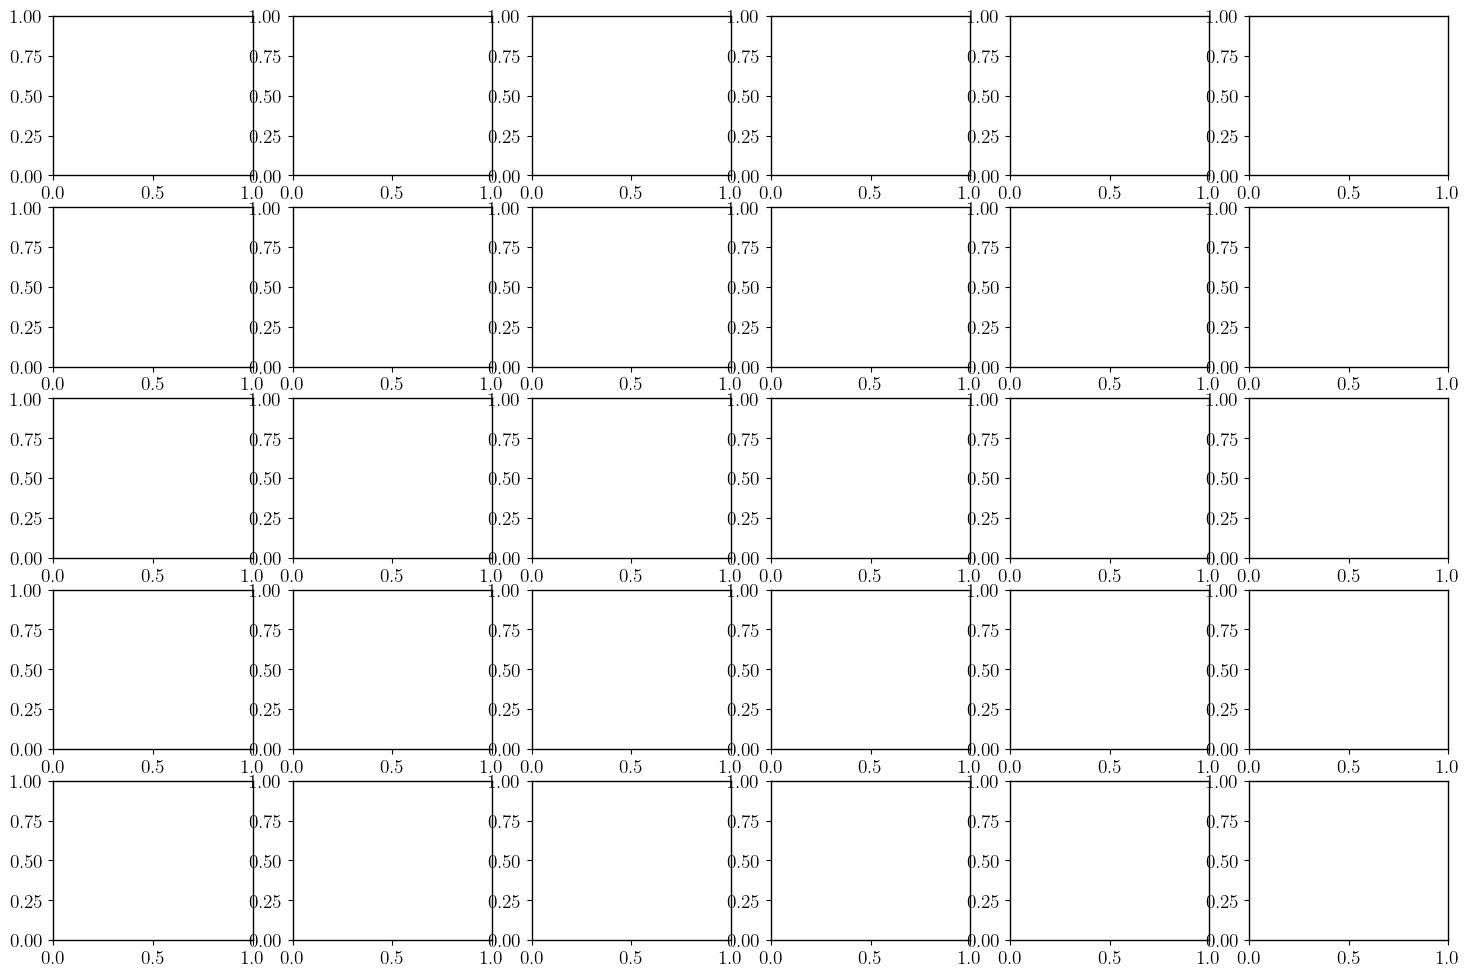

In [9]:
ModelDiagnostics.many_posteriors(model, parameter_component_index=0, x_min=3, x_max=5) # component 0 of the parameters (C_9)

In [ ]:
ModelDiagnostics.posterior_predictive_checks(model, x_o=data[-1], n_samples=200, n_points=1000)